In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---ファイルの読み込むパスを指定---
file_path_left_device = "WearableDevices/oba_l_left_foot_data.csv"
file_path_right_device = "WearableDevices/oba_l_right_foot_data.csv"
file_path_mocap = "MotionCaptures/oba_h_mocap.csv"
file_path_force = "3DGroundForces/oba_l_force.csv"

# ---CSVファイルの読み込み---
df_left_device = pd.read_csv(file_path_left_device, header=0)
df_right_device = pd.read_csv(file_path_right_device, header=0)
df_mocap = pd.read_csv(file_path_mocap, header=[2, 5, 6])
df_force = pd.read_csv(file_path_force, header=10, encoding='shift_jis')

In [245]:
new_columns = []

for col in df_mocap.columns:
    # col[0]: Rigid Body 001, col[1]: Position, col[2]: X
    
    # 1. FrameとTimeはそのまま
    if col[2] == 'Frame':
        new_columns.append('Frame')
    elif 'Time' in col[2]:
        new_columns.append('Time')
        
    # 2. それ以外は "Rigid Body " を削除して番号だけにする
    else:
        # "Rigid Body " を空文字に置換し、前後の空白も削除
        body_num = col[0].replace('Rigid Body', '').strip()
        
        # 例: 001_Position_X
        name = f"{body_num}_{col[1]}_{col[2]}"
        new_columns.append(name)

# 列名を更新
df_mocap.columns = new_columns

In [246]:
print(df_mocap.columns)

Index(['Frame', 'Time', '001_Rotation_X', '001_Rotation_Y', '001_Rotation_Z',
       '001_Position_X', '001_Position_Y', '001_Position_Z', '002_Rotation_X',
       '002_Rotation_Y', '002_Rotation_Z', '002_Position_X', '002_Position_Y',
       '002_Position_Z', '003_Rotation_X', '003_Rotation_Y', '003_Rotation_Z',
       '003_Position_X', '003_Position_Y', '003_Position_Z', '004_Rotation_X',
       '004_Rotation_Y', '004_Rotation_Z', '004_Position_X', '004_Position_Y',
       '004_Position_Z', '005_Rotation_X', '005_Rotation_Y', '005_Rotation_Z',
       '005_Position_X', '005_Position_Y', '005_Position_Z', '006_Rotation_X',
       '006_Rotation_Y', '006_Rotation_Z', '006_Position_X', '006_Position_Y',
       '006_Position_Z', '007_Rotation_X', '007_Rotation_Y', '007_Rotation_Z',
       '007_Position_X', '007_Position_Y', '007_Position_Z', '008_Rotation_X',
       '008_Rotation_Y', '008_Rotation_Z', '008_Position_X', '008_Position_Y',
       '008_Position_Z', '009_Rotation_X', '009_Rotat

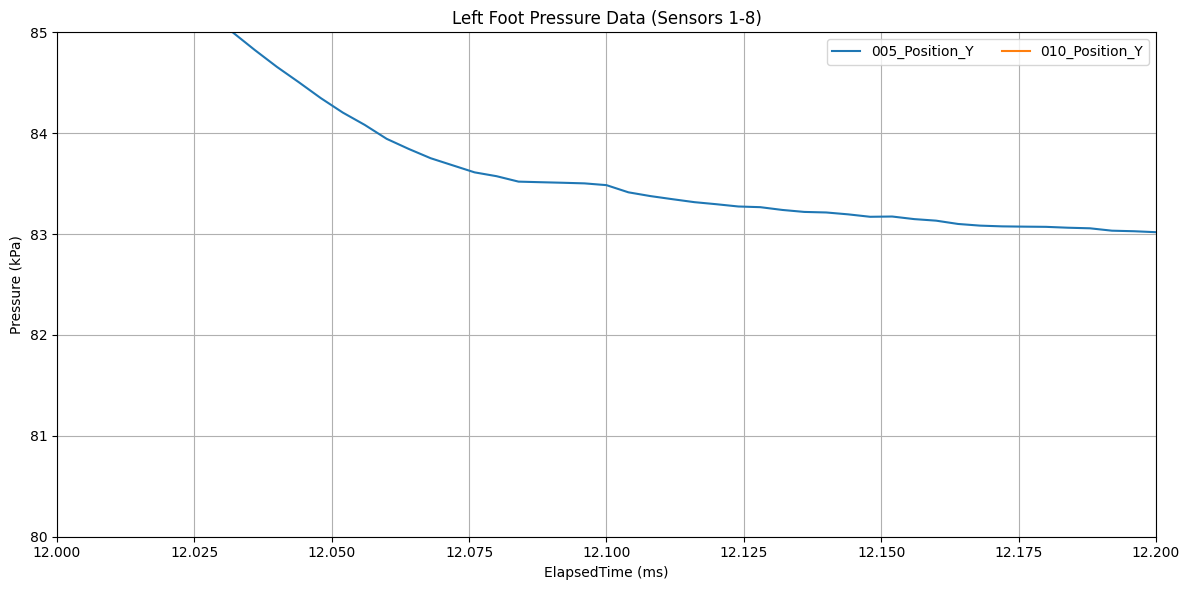

In [247]:
df_left = df_mocap

# 横軸：ElapsedTime
time_left = df_left['Time']

# 1. 足圧センサーデータ（kPa_1～8）- 左足
kpa_cols = ['005_Position_Y', '010_Position_Y',]
plt.figure(figsize=(12, 6))
for col in kpa_cols:
    plt.plot(time_left, df_left[f'{col}'], label=f'{col}')
plt.xlabel('ElapsedTime (ms)')
plt.xlim(12,12.2)
plt.ylabel('Pressure (kPa)')
plt.ylim(80, 85)
plt.title('Left Foot Pressure Data (Sensors 1-8)')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [248]:
# 1. Timeが0から20の範囲にあるデータを抽出する
# （グラフの xlim(0, 20) に対応）
mask_time = (df_mocap['Time'] >= 12) & (df_mocap['Time'] <= 12.09)
df_subset = df_mocap.loc[mask_time]

# 2. その範囲内で '005_Position_Y' が最小になる行（インデックス）を探す
if not df_subset.empty:
    min_idx = df_subset['005_Position_Y'].idxmin()

    # 3. 特定した行から Time と 値 を取得する
    min_time = df_mocap.loc[min_idx, 'Time']
    min_value = df_mocap.loc[min_idx, '005_Position_Y']
    print(f"最小値: {min_value}")
    print(f"その時の Time: {min_time}")
else:
    print("指定された範囲(0-20)にデータが存在しません．")

最小値: 83.514275
その時の Time: 12.088


In [249]:
columns_mapping = {
    'Unnamed: 0': 'Time (Seconds)',
    '右-Fx': 'R_Fx',
    '右-Fy': 'R_Fy',
    '右-Fz': 'R_Fz',
    '右-Mx': 'R_Mx',
    '右-My': 'R_My',
    '右-Mz': 'R_Mz',
    '右-COPx': 'R_COPx',
    '右-COPy': 'R_COPy',
    '左-Fx': 'L_Fx',
    '左-Fy': 'L_Fy',
    '左-Fz': 'L_Fz',
    '左-Mx': 'L_Mx',
    '左-My': 'L_My',
    '左-Mz': 'L_Mz',
    '左-COPx': 'L_COPx',
    '左-COPy': 'L_COPy',
    '右-速度計': 'R_SpeedMeter',
    '左-速度計': 'L_SpeedMeter',
    '右-外部制御': 'R_ExtControl',
    '左-外部制御': 'L_ExtControl',
    '右-速度': 'R_Speed',
    '左-速度': 'L_Speed',
    '右-実速度': 'R_ActualSpeed',
    '左-実速度': 'L_ActualSpeed',
    '右-実効負荷率': 'R_EffLoadRatio',
    '右-ピーク負荷率': 'R_PeakLoadRatio',
    '右-消費電力': 'R_Power',
    '左-実効負荷率': 'L_EffLoadRatio',
    '左-ピーク負荷率': 'L_PeakLoadRatio',
    '左-消費電力': 'L_Power',
    'アナログ入力1': 'Analog1'
}

df_force = df_force.rename(columns=columns_mapping)

In [250]:
print(df_force.columns)

Index(['Time (Seconds)', 'R_Fx', 'R_Fy', 'R_Fz', 'R_Mx', 'R_My', 'R_Mz',
       'R_COPx', 'R_COPy', 'L_Fx', 'L_Fy', 'L_Fz', 'L_Mx', 'L_My', 'L_Mz',
       'L_COPx', 'L_COPy', 'R_SpeedMeter', 'L_SpeedMeter', 'R_ExtControl',
       'L_ExtControl', 'R_Speed', 'L_Speed', 'R_ActualSpeed', 'L_ActualSpeed',
       'R_EffLoadRatio', 'R_PeakLoadRatio', 'R_Power', 'L_EffLoadRatio',
       'L_PeakLoadRatio', 'L_Power', 'Analog1'],
      dtype='object')


In [251]:
# R_Fx が 5.00 を超えている行をすべて抽出
condition = df_force['L_Fz'] > 5.00
filtered_df = df_force[condition]

# その時の Time (Seconds) を取得
result_times = filtered_df['Time (Seconds)']

if not result_times.empty:
    first_time = result_times.iloc[0]
    print(f"最初に5.00を超えた時間: {first_time}")
else:
    print("5.00を超えるデータはありません．")

最初に5.00を超えた時間: 4.262


In [263]:
# R_Fx が 5.00 を超えている行をすべて抽出
condition = df_force['L_Speed'] >= 3.75
filtered_df = df_force[condition]

# その時の Time (Seconds) を取得
result_times = filtered_df['Time (Seconds)']

if not result_times.empty:
    first_time = result_times.iloc[0]
    print(f"最初に5.00を超えた時間: {first_time}")
else:
    print("5.00を超えるデータはありません．")

最初に5.00を超えた時間: 26.364


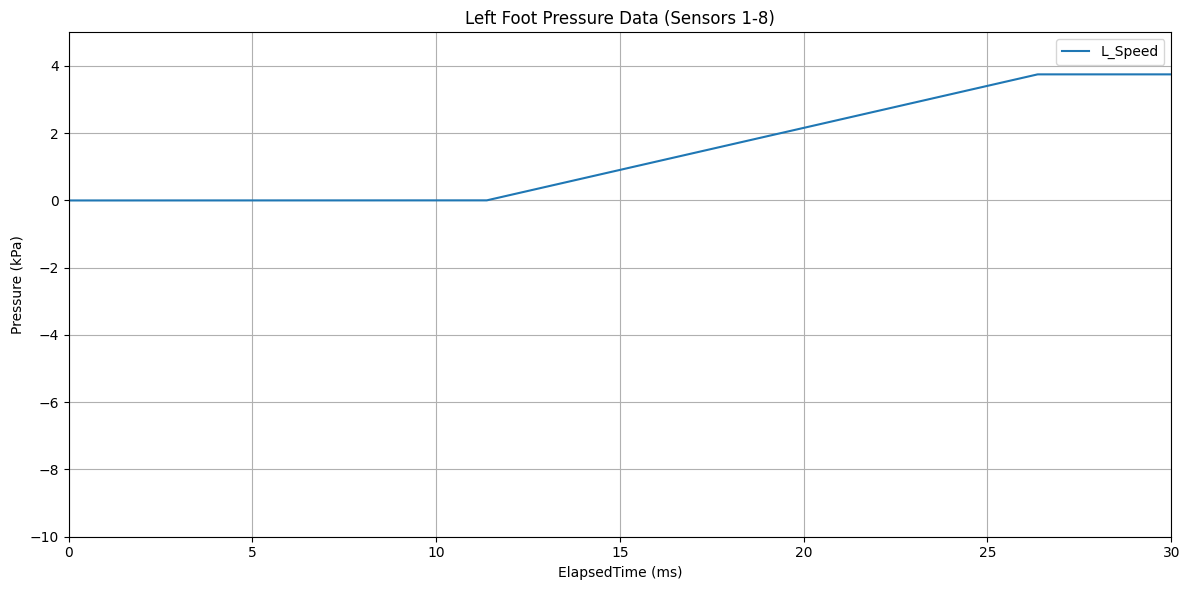

In [264]:
df_left = df_force

# 横軸：ElapsedTime
time_left = df_left['Time (Seconds)']

# 1. 足圧センサーデータ（kPa_1～8）- 左足
kpa_cols = ['L_Speed']
plt.figure(figsize=(12, 6))
for col in kpa_cols:
    plt.plot(time_left, df_left[f'{col}'], label=f'{col}')
plt.xlabel('ElapsedTime (ms)')
plt.xlim(0,30)
plt.ylabel('Pressure (kPa)')
plt.ylim(-10, 5)
plt.title('Left Foot Pressure Data (Sensors 1-8)')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [254]:
# 'A'列がNaNではない(notna)データのみ抽出
df_clean_left = df_left_device[df_left_device['Marker'].notna()]
df_clean_right = df_right_device[df_right_device['Marker'].notna()]

print(df_clean_left['Marker'].value_counts())
print(df_clean_right['Marker'].value_counts())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [255]:
from scipy.interpolate import interp1d

def process_resampling(df_input, sampling_interval=10):
    """
    データフレームを受け取り、リサンプリングと単位変換を行って返す関数
    """
    # 元のデータを変更しないようにコピーを作成
    df = df_input.copy()

    # --- 1. 欠損値の補完（リサンプリング前） ---
    # Marker列を除外して線形補完
    exclude_cols = ['Marker']
    target_cols = df.columns.difference(exclude_cols)
    
    # 補完処理
    df[target_cols] = df[target_cols].interpolate(method='linear', axis=0)

    # --- 2. 新しい時間軸の作成 (100Hz = 10ms) ---
    time_min = 0
    time_max = df['ElapsedTime'].max()
    new_time = np.arange(time_min, time_max, sampling_interval)
    
    # 新しい時間軸を持つDataFrameを作成
    df_resampled = pd.DataFrame({'ElapsedTime': new_time})

    # --- 3. マーカー列（不連続データ）の処理 ---
    # マーカー列が存在する場合のみ処理を行う
    if exclude_cols:
        df_markers = df[['ElapsedTime'] + exclude_cols].dropna(subset=exclude_cols, how='all').copy()
        
        # マーカーのタイミングを新しいサンプリングレートのグリッドに丸める
        df_markers['ElapsedTime_rounded'] = (df_markers['ElapsedTime'] / sampling_interval).round() * sampling_interval
        # 同じタイミングに重複した場合の処理（重複削除）
        df_markers = df_markers.drop_duplicates(subset=['ElapsedTime_rounded'])
        
        # 結合用のキーを作成 (整数化して浮動小数点の誤差を回避)
        df_resampled['MergeKey'] = df_resampled['ElapsedTime'].round().astype(int)
        df_markers['MergeKey'] = df_markers['ElapsedTime_rounded'].round().astype(int)
        
        # マーカー情報を結合
        df_resampled = pd.merge(
            df_resampled,
            df_markers[['MergeKey'] + exclude_cols],
            left_on='MergeKey',
            right_on='MergeKey',
            how='left'
        )
        # 不要なキーを削除
        df_resampled = df_resampled.drop(columns=['MergeKey'])

    # --- 4. 連続値データの補間 (interp1d) ---
    # 補間から除外するカラム（時間とマーカー）
    columns_to_exclude = ['ElapsedTime'] + exclude_cols
    
    for column in df.columns:
        if column in columns_to_exclude:
            continue
        
        # interp1dによる線形補間関数作成 (外挿あり)
        interpolator = interp1d(df['ElapsedTime'], df[column], 
                                kind='linear', 
                                fill_value='extrapolate')
        
        # 新しい時間軸で値を計算して代入
        df_resampled[column] = interpolator(new_time)

    # --- 5. 単位変換とリネーム ---
    # ms -> s
    df_resampled['ElapsedTime'] = df_resampled['ElapsedTime'] / 1000
    # カラム名変更
    df_resampled = df_resampled.rename(columns={'ElapsedTime': 'Time (Seconds)'})

    return df_resampled

# 関数を適用して左右それぞれ処理
df_left_processed = process_resampling(df_left_device, sampling_interval=10)
df_right_processed = process_resampling(df_right_device, sampling_interval=10)

# 結果の確認
print("Left Data Columns:", df_left_processed.columns)
print("Right Data Columns:", df_right_processed.columns)
print(df_left_processed.head())

Left Data Columns: Index(['Time (Seconds)', 'Marker', 'Left_kPa_1', 'Left_kPa_2', 'Left_kPa_3',
       'Left_kPa_4', 'Left_kPa_5', 'Left_kPa_6', 'Left_kPa_7', 'Left_kPa_8',
       'Left_Accel_X', 'Left_Accel_Y', 'Left_Accel_Z', 'Left_Gyro_X',
       'Left_Gyro_Y', 'Left_Gyro_Z'],
      dtype='object')
Right Data Columns: Index(['Time (Seconds)', 'Marker', 'Right_kPa_1', 'Right_kPa_2', 'Right_kPa_3',
       'Right_kPa_4', 'Right_kPa_5', 'Right_kPa_6', 'Right_kPa_7',
       'Right_kPa_8', 'Right_Accel_X', 'Right_Accel_Y', 'Right_Accel_Z',
       'Right_Gyro_X', 'Right_Gyro_Y', 'Right_Gyro_Z'],
      dtype='object')
   Time (Seconds)  Marker  Left_kPa_1  Left_kPa_2  Left_kPa_3  Left_kPa_4  \
0            0.00     NaN    2.383994    1.826595    7.341202    8.748256   
1            0.01     NaN    2.604705    1.826595    7.817701    8.225619   
2            0.02     NaN    3.038397    1.606759    7.951121    7.969418   
3            0.03     NaN    2.946065    1.533481    7.484152    8.2252

In [256]:
from scipy import signal

# --- 設定パラメータ ---
DEVICE_FREQ = 100          # デバイスのサンプリング周波数 (Hz)
CUTOFF_FREQ = 6            # ローパスフィルタのカットオフ周波数 (Hz)
FILTER_ORDER = 4           # フィルタの次数

def apply_lowpass_filter(data, cutoff, fs, order=4):
    """
    Butterworthローパスフィルタを適用するヘルパー関数
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    y = signal.filtfilt(b, a, data, axis=0)
    return y

def process_smoothing_dataframe(df_input, fs=DEVICE_FREQ, cutoff=CUTOFF_FREQ, order=FILTER_ORDER):
    """
    1. TimeとMarker以外の全カラムにフィルタをかける
    2. 'kPa' を含むカラム（圧力）だけ、マイナス値を0に補正する
    """
    df_smooth = df_input.copy()
    
    # --- 1. 平滑化対象のカラムを特定 (Time, Marker以外すべて) ---
    exclude_keywords = ['Time (Seconds)', 'Marker']
    # フィルタ対象：TimeやMarkerを含まない全てのカラム（IMUデータ含む）
    filter_target_cols = [
        col for col in df_smooth.columns 
        if col not in exclude_keywords and 'Marker' not in col
    ]
    
    # --- 2. 欠損値の補完 & フィルタ実行 ---
    # 欠損があるとフィルタできないため補完
    df_smooth[filter_target_cols] = df_smooth[filter_target_cols].interpolate(method='linear', limit_direction='both')
    df_smooth[filter_target_cols] = df_smooth[filter_target_cols].fillna(0)

    # フィルタ適用 (IMUも圧力もここで滑らかになります)
    df_smooth[filter_target_cols] = apply_lowpass_filter(
        df_smooth[filter_target_cols].values, 
        cutoff=cutoff, 
        fs=fs, 
        order=order
    )
    
    # --- 3. 圧力データのみマイナス値を0にする (クリッピング) ---
    # カラム名に 'kPa' が含まれるものだけを抽出 (例: Right_kPa_1, Left_kPa_8 など)
    pressure_cols = [col for col in filter_target_cols if 'kPa' in col]
    
    if pressure_cols:
        # 該当するカラムのデータを取り出し、0未満を0にする
        df_pressure = df_smooth[pressure_cols]
        df_smooth[pressure_cols] = df_pressure.mask(df_pressure < 0, 0)
    
    return df_smooth

# --- メイン処理 ---

# 左右それぞれのデータフレームに適用
df_left_smoothed = process_smoothing_dataframe(df_left_processed)
df_right_smoothed = process_smoothing_dataframe(df_right_processed)

In [257]:
def process_zscore_normalization(df_input, duration=300):
    """
    マーカー出現タイミングから指定時間(duration秒)のデータを用いて
    平均・標準偏差を算出し、Zスコア化を行う関数。
    """
    df_z = df_input.copy()
    
    # --- 1. 計算対象カラムの特定 ---
    # Time, Marker 以外を計算対象とする
    exclude_keywords = ['Time (Seconds)', 'Marker']
    target_cols = [
        col for col in df_z.columns 
        if col not in exclude_keywords and 'Marker' not in col
    ]
    
    # --- 2. 基準となる期間（マーカー開始〜300秒）の特定 ---
    # マーカー列（Marker_xなど）を探す
    marker_cols = [col for col in df_z.columns if 'Marker' in col]
    
    start_time = 0
    if marker_cols:
        # マーカーが入っている（NaNでない）最初の行を探す
        # dropnaでNaNを消し、最初の行のTimeを取得
        valid_markers = df_z[['Time (Seconds)'] + marker_cols].dropna(subset=marker_cols, how='all')
        
        if not valid_markers.empty:
            start_time = valid_markers.iloc[0]['Time (Seconds)']
            print(f"Marker found at: {start_time:.2f} s")
        else:
            print("Warning: No marker found. Using start time = 0 s")
    
    end_time = start_time + duration
    
    # 統計量算出用のデータをスライス（抽出）
    # start_time <= Time <= end_time の範囲
    mask = (df_z['Time (Seconds)'] >= start_time) & (df_z['Time (Seconds)'] <= end_time)
    df_stats_base = df_z.loc[mask, target_cols]
    
    print(f"Statistics calculated range: {start_time:.1f}s - {end_time:.1f}s (Rows: {len(df_stats_base)})")

    # --- 3. 平均・標準偏差の算出 ---
    means = df_stats_base.mean()
    stds = df_stats_base.std()
    
    # --- 4. Zスコア化の実行 ---
    # 標準偏差が0の場合（ずっと値が変わらない場合）、割り算で無限大(inf)になるのを防ぐ
    # stdが0の場合は1に置換して、結果(x-mean)を0にする
    stds = stds.replace(0, 1)
    
    # 計算: (値 - 平均) / 標準偏差
    df_z[target_cols] = (df_z[target_cols] - means) / stds
    
    return df_z, means, stds

# --- メイン処理 ---

# 左右それぞれのデータフレームに適用 (平滑化済みのデータを使用)
print("--- Processing Left Device ---")
df_left_z, left_means, left_stds = process_zscore_normalization(df_left_smoothed, duration=300)

print("\n--- Processing Right Device ---")
df_right_z, right_means, right_stds = process_zscore_normalization(df_right_smoothed, duration=300)

# 結果確認
print("\nTransformation Complete.")
print("Left Z-score Data Head:")
print(df_left_z.head())

# 確認: Zスコア化後の平均は0、標準偏差は1に近くなるはず（計算範囲内データにおいて）
# print(df_left_z[(df_left_z['Time (Seconds)'] >= start) & (df_left_z['Time (Seconds)'] <= end)].mean())

--- Processing Left Device ---
Statistics calculated range: 0.0s - 300.0s (Rows: 30001)

--- Processing Right Device ---
Statistics calculated range: 0.0s - 300.0s (Rows: 30001)

Transformation Complete.
Left Z-score Data Head:
   Time (Seconds)  Marker  Left_kPa_1  Left_kPa_2  Left_kPa_3  Left_kPa_4  \
0            0.00     NaN   -0.459935   -0.238960    1.145610   -0.128480   
1            0.01     NaN   -0.455441   -0.265290    1.149710   -0.143843   
2            0.02     NaN   -0.450913   -0.290031    1.152891   -0.158065   
3            0.03     NaN   -0.446395   -0.311930    1.154860   -0.170080   
4            0.04     NaN   -0.441947   -0.329912    1.155510   -0.179116   

   Left_kPa_5  Left_kPa_6  Left_kPa_7  Left_kPa_8  Left_Accel_X  Left_Accel_Y  \
0   -0.408307    0.161766   -0.262193   -0.547721      0.165889     -0.631936   
1   -0.399412    0.166265   -0.260451   -0.538126      0.110734     -0.695116   
2   -0.391334    0.170258   -0.258774   -0.528944      0.059983   

In [258]:
def detect_heel_strikes(signal_array, threshold=10, min_dist_samples=40):
    """
    踵接地 (HS) のタイミング（インデックス）を検出する関数
    
    Parameters:
    - signal_array: 踵の圧力データの配列 (numpy array)
    - threshold: 接地とみなす閾値 (kPa)。ノイズより大きく設定。
    - min_dist_samples: 次の接地までの最小サンプル数 (不応期)。
                        100Hzで0.4秒なら40サンプル。
    
    Returns:
    - indices: 接地開始タイミングのインデックス配列
    """
    # 閾値を超えている場所をTrue, それ以外をFalseにする
    is_contact = signal_array > threshold
    
    # False(浮いている) -> True(着いた) に切り替わる瞬間を検出 (立ち上がりエッジ)
    # diffをとると、立ち上がりは 1 (True), 立ち下がりは -1, 変化なしは 0
    # prepend=False で配列サイズを合わせる
    rising_edge = np.diff(is_contact.astype(int), prepend=0) == 1
    
    # 候補となるインデックスを取得
    potential_indices = np.where(rising_edge)[0]
    
    if len(potential_indices) == 0:
        return np.array([])

    # --- 不応期（チャタリング除去）処理 ---
    # 直前の検出から min_dist_samples 以内の検出は無視する
    true_indices = [potential_indices[0]]
    
    for idx in potential_indices[1:]:
        if idx - true_indices[-1] > min_dist_samples:
            true_indices.append(idx)
            
    return np.array(true_indices)

def slice_strides(df_target, split_indices):
    """
    インデックスに基づいてデータフレームを分割し、リストに格納する関数
    
    Parameters:
    - df_target: 分割したいデータフレーム (Zスコア化済みデータなど)
    - split_indices: 接地点のインデックス配列
    
    Returns:
    - stride_list: 分割されたデータフレームのリスト
    """
    strides = []
    
    # インデックス間のデータを切り出す
    # 例: idx[0]〜idx[1], idx[1]〜idx[2], ...
    for i in range(len(split_indices) - 1):
        start_idx = split_indices[i]
        end_idx = split_indices[i+1]
        
        # スライス (コピーを作成しておく)
        stride_df = df_target.iloc[start_idx:end_idx].copy()
        
        # 1ストライドの時間軸を0からスタートするようにリセットする場合
        # stride_df['Time (Seconds)'] = stride_df['Time (Seconds)'] - stride_df['Time (Seconds)'].iloc[0]
        
        strides.append(stride_df)
        
    return strides

def extract_strides_in_window(df_smooth, df_z, heel_col, duration=300, threshold=10, min_dist_sec=0.6, fs=100, show_plot=True, title_prefix=""):
    """
    Marker開始から300秒間を切り出し、ストライド分割を行う関数 (プロット機能付き)

    Parameters:
    - df_smooth: 接地検出用のデータ (平滑化済み, kPa単位)
    - df_z:     出力用のデータ (Zスコア化済み)
    - heel_col: 踵の圧力カラム名
    - duration: 切り出す期間 (秒)
    
    Returns:
    - stride_list: 分割された1歩ごとのDataFrameリスト (Zスコア化データ)

    """
    
    # 1. マーカー開始時刻の特定
    marker_cols = [c for c in df_smooth.columns if 'Marker' in c]
    if not marker_cols:
        print("Error: No marker column found.")
        return []
    
    valid_markers = df_smooth[['Time (Seconds)'] + marker_cols].dropna(subset=marker_cols, how='all')
    if valid_markers.empty:
        print("Error: Marker never appears.")
        return []
        
    start_time = valid_markers.iloc[0]['Time (Seconds)']
    end_time = start_time + duration
    
    print(f"[{title_prefix}] Target Window: {start_time:.2f}s - {end_time:.2f}s")
    
    # 2. 300秒間だけデータを切り出す
    mask = (df_smooth['Time (Seconds)'] >= start_time) & (df_smooth['Time (Seconds)'] <= end_time)
    
    # indexをリセット (0行目 = 切り出し開始地点)
    df_crop_smooth = df_smooth.loc[mask].reset_index(drop=True)
    df_crop_z      = df_z.loc[mask].reset_index(drop=True)
    
    if df_crop_smooth.empty:
        print("Warning: Cropped dataframe is empty.")
        return []

    # 3. 接地タイミングを検出
    heel_signal = df_crop_smooth[heel_col].values
    min_dist_samples = int(min_dist_sec * fs)
    
    hs_indices = detect_heel_strikes(heel_signal, threshold=threshold, min_dist_samples=min_dist_samples)
    print(f"  > Detected {len(hs_indices)} steps.")
    
    # --- ★追加: 確認用プロット ---
    if show_plot and len(hs_indices) > 0:
        plt.figure(figsize=(15, 6))
        
        # 踵の圧力波形
        time_axis = df_crop_smooth['Time (Seconds)']
        # 切り出し後の相対時間にするなら以下を有効化
        # time_axis = time_axis - time_axis.iloc[0] 
        
        plt.plot(time_axis, heel_signal, label=f'{heel_col} (Pressure)', color='tab:blue', linewidth=1)
        
        # 検出ポイントを赤×でプロット
        plt.plot(time_axis.iloc[hs_indices], 
                 heel_signal[hs_indices], 
                 'rx', markersize=12, markeredgewidth=2, label='Detected HS')
        
        # 閾値ライン
        plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold} kPa)')
        
        plt.title(f"{title_prefix} Heel Strike Detection (First 10s check)")
        plt.xlabel("Time (s)")
        plt.ylabel("Pressure (kPa)")
        plt.legend(loc='upper right')
        
        # 見やすいように最初の10秒だけ拡大 (データがあれば)
        plot_start = time_axis.iloc[0]
        plot_end = min(time_axis.iloc[-1], plot_start + 20) # 最初の10秒、あるいはデータの終わりまで
        plt.xlim(plot_start, plot_end)
        
        plt.grid(True, which='both', linestyle='--', alpha=0.7)
        plt.show()

    # 4. 分割
    stride_list = slice_strides(df_crop_z, hs_indices)
    
    return stride_list

# ==========================================
# 実行 (プロットが表示されます)
# ==========================================

LEFT_HEEL_COL = 'Left_kPa_8'   
RIGHT_HEEL_COL = 'Right_kPa_8'

# 左足の処理と確認
left_strides = extract_strides_in_window(
    df_smooth=df_left_smoothed, 
    df_z=df_left_z, 
    heel_col=LEFT_HEEL_COL,
    show_plot=True,         # ★これでグラフが出ます
    title_prefix="Left Foot"
)

# 右足の処理と確認
right_strides = extract_strides_in_window(
    df_smooth=df_right_smoothed, 
    df_z=df_right_z, 
    heel_col=RIGHT_HEEL_COL,
    show_plot=True,         # ★これでグラフが出ます
    title_prefix="Right Foot"
)

Error: Marker never appears.
Error: Marker never appears.


In [259]:
def plot_ensemble_strides(stride_list, target_col, title="Stride Ensemble", unit="Z-score"):
    """
    複数のストライドデータを0-100%に正規化して重ね書きする関数
    
    Parameters:
    - stride_list: 切り出されたDataFrameのリスト
    - target_col: プロットしたいカラム名 (例: 'Right_kPa_1' や 'Acc_X')
    - title: グラフのタイトル
    - unit: Y軸の単位ラベル
    """
    if not stride_list:
        print("No strides to plot.")
        return

    # 正規化後のデータ点数 (0% ~ 100% を 101分割)
    norm_length = 101
    x_norm = np.linspace(0, 100, norm_length)
    
    # データを蓄積するリスト
    ensemble_data = []

    plt.figure(figsize=(10, 6))

    # --- 1. 個別のストライドをプロット ---
    for df in stride_list:
        # 対象カラムのデータを取得
        y_values = df[target_col].values
        
        # データの長さが足りない場合はスキップ（念のため）
        if len(y_values) < 2:
            continue

        # 時間軸の正規化 (線形補間を使ってデータ点数をnorm_lengthに揃える)
        # 元の配列のインデックスを 0~100 にマッピング
        x_original = np.linspace(0, 100, len(y_values))
        y_interp = np.interp(x_norm, x_original, y_values)
        
        ensemble_data.append(y_interp)

        # 薄いグレーでプロット
        plt.plot(x_norm, y_interp, color='gray', alpha=0.3, linewidth=1)

    # --- 2. 平均波形の計算とプロット ---
    if ensemble_data:
        # numpy配列に変換 (行: ストライド数, 列: 101)
        ensemble_matrix = np.array(ensemble_data)
        
        # 平均と標準偏差を計算
        mean_waveform = np.mean(ensemble_matrix, axis=0)
        std_waveform = np.std(ensemble_matrix, axis=0)
        
        # 平均値を赤色でプロット
        plt.plot(x_norm, mean_waveform, color='red', linewidth=3, label='Mean')
        
        # (オプション) 標準偏差の範囲を塗りつぶし
        plt.fill_between(x_norm, 
                         mean_waveform - std_waveform, 
                         mean_waveform + std_waveform, 
                         color='red', alpha=0.1, label='±1 SD')

    # --- 3. グラフの装飾 ---
    plt.title(f"{title} - {target_col}")
    plt.xlabel("Gait Cycle (%)")
    plt.ylabel(f"Value ({unit})")
    plt.xlim(0, 100)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

# ==========================================
# 実行例
# ==========================================
plot_ensemble_strides(
    stride_list=left_strides, 
    target_col='Left_kPa_8', 
    title="Left Heel Pressure",
    unit="Z-score"
)
plot_ensemble_strides(
    stride_list=right_strides, 
    target_col='Right_kPa_8', 
    title="Right Heel Pressure",
    unit="Z-score"
)

No strides to plot.
No strides to plot.


左足マーカー数: 0
[]
右足マーカー数: 0
[]


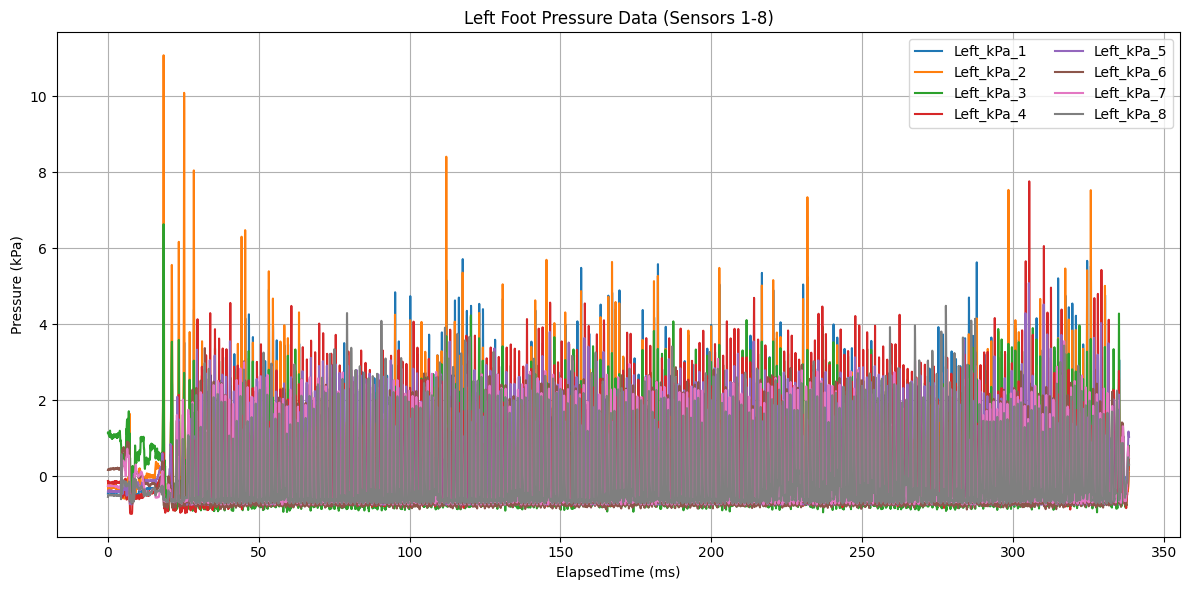

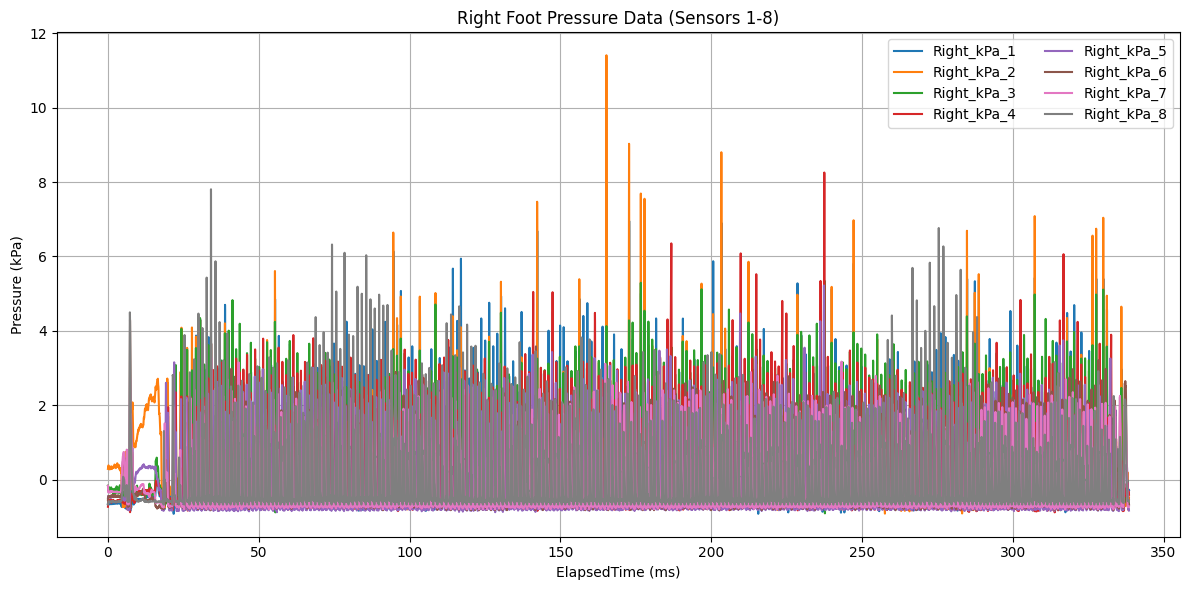

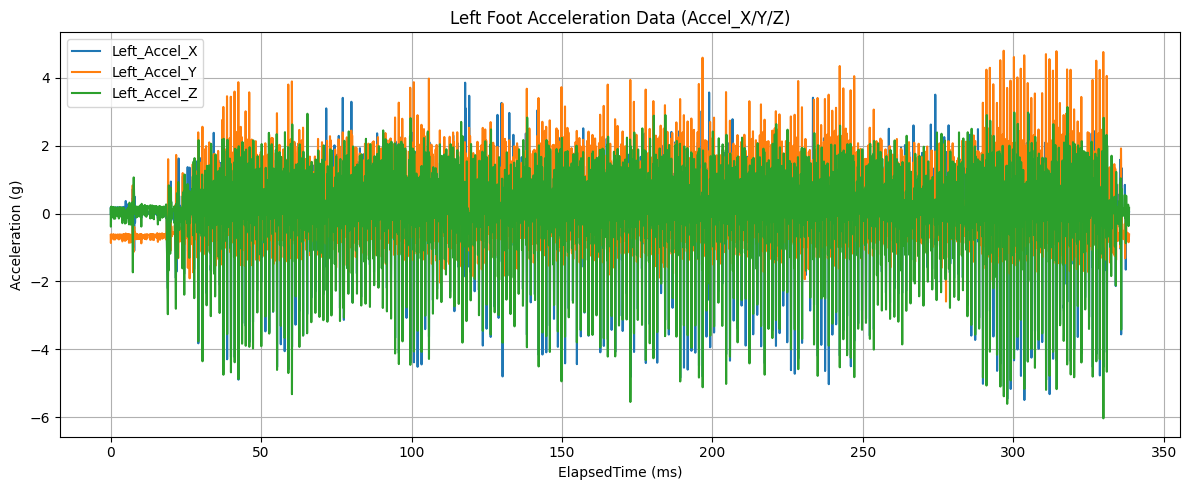

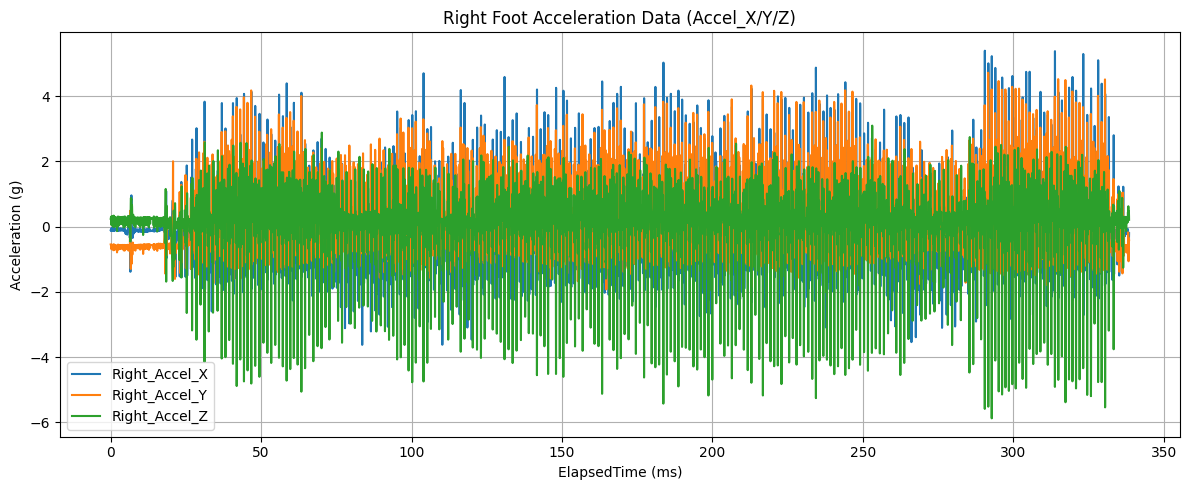

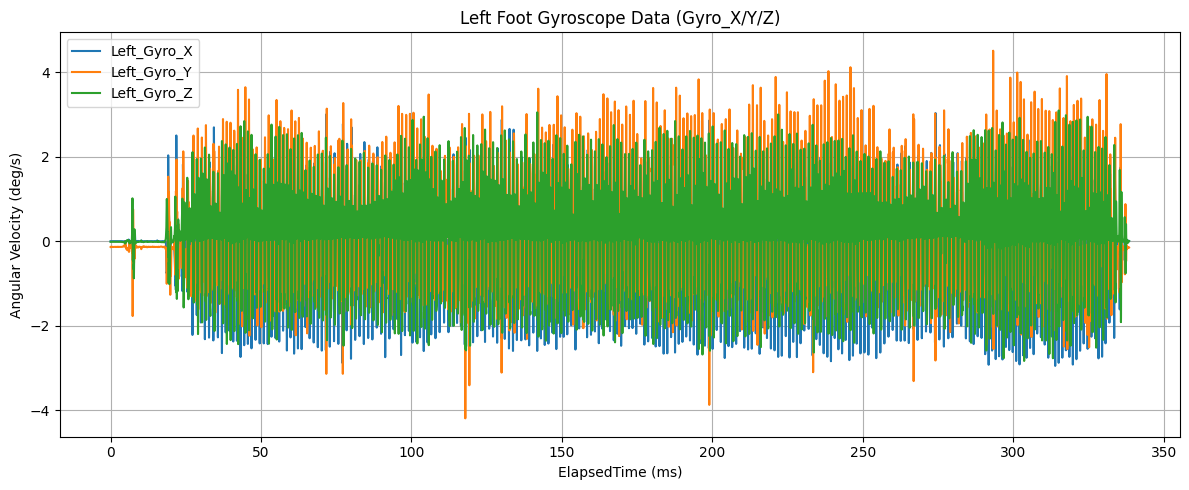

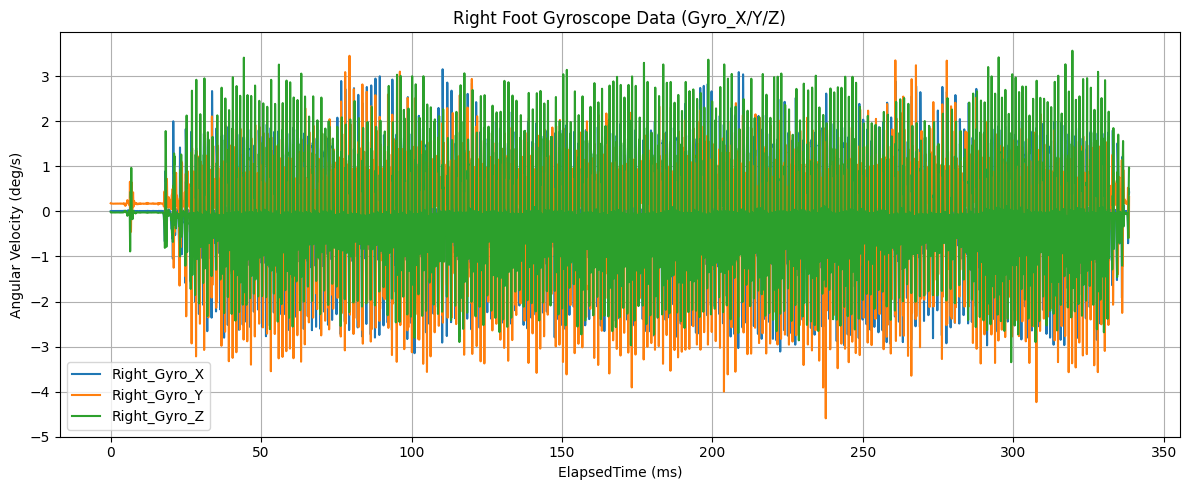

In [260]:
df_left = df_left_z
df_right = df_right_z

# 横軸：ElapsedTime
time_left = df_left['Time (Seconds)']
time_right = df_right['Time (Seconds)']

# マーカーが記録されている時刻を取得（0でない，かつNaNでない行）
marker_times_left = df_left[(df_left['Marker'].notna()) & (df_left['Marker'] != 0)]['Time (Seconds)']
marker_times_right = df_right[(df_right['Marker'].notna()) & (df_right['Marker'] != 0)]['Time (Seconds)']
print(f"左足マーカー数: {len(marker_times_left)}")
print(marker_times_left.tolist())
print(f"右足マーカー数: {len(marker_times_right)}")
print(marker_times_right.tolist())



# 1. 足圧センサーデータ（kPa_1～8）- 左足
kpa_cols = ['kPa_1', 'kPa_2', 'kPa_3', 'kPa_4', 'kPa_5', 'kPa_6', 'kPa_7', 'kPa_8']
plt.figure(figsize=(12, 6))
for col in kpa_cols:
    plt.plot(time_left, df_left[f'Left_{col}'], label=f'Left_{col}')
for t in marker_times_left:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
# plt.xlim(40000,50000)
plt.ylabel('Pressure (kPa)')
plt.title('Left Foot Pressure Data (Sensors 1-8)')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. 足圧センサーデータ（kPa_1～8）- 右足
plt.figure(figsize=(12, 6))
for col in kpa_cols:
    plt.plot(time_right, df_right[f'Right_{col}'], label=f'Right_{col}')
for t in marker_times_right:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
# plt.xlim(40000,50000)
plt.ylabel('Pressure (kPa)')
plt.title('Right Foot Pressure Data (Sensors 1-8)')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 加速度データ - 左足
accel_cols = ['Accel_X', 'Accel_Y', 'Accel_Z']

plt.figure(figsize=(12, 5))
for col in accel_cols:
    plt.plot(time_left, df_left[f'Left_{col}'], label=f'Left_{col}')
for t in marker_times_left:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
plt.ylabel('Acceleration (g)')
plt.title('Left Foot Acceleration Data (Accel_X/Y/Z)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 加速度データ - 右足
plt.figure(figsize=(12, 5))
for col in accel_cols:
    plt.plot(time_right, df_right[f'Right_{col}'], label=f'Right_{col}')
for t in marker_times_right:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
plt.ylabel('Acceleration (g)')
plt.title('Right Foot Acceleration Data (Accel_X/Y/Z)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 角速度データ - 左足
gyro_cols = ['Gyro_X', 'Gyro_Y', 'Gyro_Z']

plt.figure(figsize=(12, 5))
for col in gyro_cols:
    plt.plot(time_left, df_left[f'Left_{col}'], label=f'Left_{col}')
for t in marker_times_left:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
plt.ylabel('Angular Velocity (deg/s)')
plt.title('Left Foot Gyroscope Data (Gyro_X/Y/Z)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 角速度データ - 右足
plt.figure(figsize=(12, 5))
for col in gyro_cols:
    plt.plot(time_right, df_right[f'Right_{col}'], label=f'Right_{col}')
for t in marker_times_right:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
plt.ylabel('Angular Velocity (deg/s)')
plt.title('Right Foot Gyroscope Data (Gyro_X/Y/Z)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()